### Import Library and dataset

In [1]:
import pandas as pd
dataset = pd.read_csv('https://raw.githubusercontent.com/algonacci/Data-Warehouse/main/online_raw.csv')
dataset.fillna(dataset.mean(), inplace = True)

C:\Users\Vulcan\AppData\Local\Temp/ipykernel_11336/2500067087.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean(), inplace = True)


In [2]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
dataset['Month'] = LE.fit_transform(dataset['Month'])
LE = LabelEncoder()
dataset['VisitorType'] = LE.fit_transform(dataset['VisitorType'])
X = dataset.drop(['Revenue'], axis = 1)
y = dataset['Revenue']

### Splitting the data

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

### Make the model

In [4]:
from sklearn.linear_model import LogisticRegression

# Call the classifier
logreg = LogisticRegression()
# Fit the classifier to the training data  
logreg = logreg.fit(X_train,y_train)
#Training Model: Predict 
y_pred = logreg.predict(X_test)

C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Evaluation

In [5]:
print('Training Accuracy :', logreg.score(X_train, y_train))  
print('Testing Accuracy :', logreg.score(X_test, y_test))  

Training Accuracy : 0.8803730738037308
Testing Accuracy : 0.8848337388483374


In [6]:
from sklearn.metrics import confusion_matrix, classification_report

In [7]:
print('\nClassification report')  
cr = classification_report(y_test, y_pred)  
print(cr)


Classification report
              precision    recall  f1-score   support

       False       0.90      0.97      0.93      2084
        True       0.73      0.41      0.52       382

    accuracy                           0.88      2466
   macro avg       0.82      0.69      0.73      2466
weighted avg       0.87      0.88      0.87      2466



In [8]:
print('\nConfusion matrix')  
cm = confusion_matrix(y_test, y_pred)  
print(cm)


Confusion matrix
[[2027   57]
 [ 227  155]]


### Visualization

In [9]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_pred)), ('Positive', 'Negative'), ('Positive', 'Negative'))

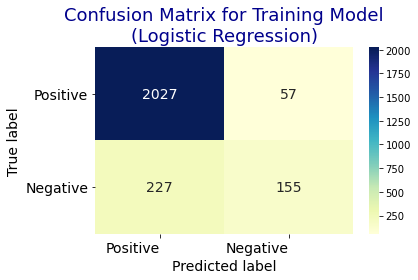

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

### ROC Curve and AUV

In [11]:
ns_probs = [0 for _ in range(len(y_test))]

In [14]:
lr_probs = logreg.predict_proba(X_test)

In [15]:
lr_probs = lr_probs[:, 1]

In [18]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

In [19]:
print('ROC AUC=%.3f' % (ns_auc))
print('ROC AUC=%.3f' % (lr_auc))

ROC AUC=0.500
ROC AUC=0.839


In [21]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

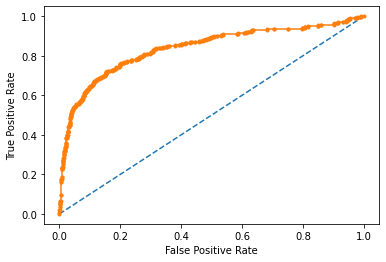

In [23]:
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()